# Object Location Memory NWB Tutorial

This tutorial demonstrates how to load and explore an NWB file containing only behavioral data from the object location memory experiment, part of the [Rat Behavioural Phenotyping Pipeline Methodologies](https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/).

Contents:

- [Reading NWBFile locally](#read-nwb)
- [Access Subject Metadata](#access-subject)
- [Access Devices Metadata](#access-devices)
- [Access Behavioral Videos](#access-behavior)
- [Access Annotated Behavioral Events](#access-events)



# Reading an NWB file locally<a id="read-nwb"></a>


This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.

In [1]:
from pynwb import NWBHDF5IO
from pathlib import Path
# Define the path to the NWB file
directory = Path("D:/kind_lab_conversion_nwb/object_location_memory")
session_id = "OLM_STM"
subject_id = "617_Scn2a(8)"
nwbfile_path = directory / f"sub-{subject_id}_ses-{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
nwbfile = io.read()

c:\Users\Utente\anaconda3\envs\kind_lab_to_nwb_env\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [2]:
print(nwbfile.experiment_description)

This experiment is part of the Rat Behavioural Phenotyping Pipeline Methodologies https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/.
As an initial effort to characterize the rat lines, these models are being behaviorally phenotyped at SIDB. 
Rat models are phenotyped according to a rigorous pipeline that assesses behaviours relevant to autism with intellectual disability, such as social and motor skills, and learning and sensory processing. 
Different cohorts of rats are run through different subsets of tasks to overcome potential order effects on behaviours and to limit the number of tasks each animal is put through.
This experiment investigated object location memory in different rat models 
(Arid1b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394518, 
Grin2b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394515, 
Scn2a: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=25394530).
The experimenter was blind to genotype throughout the exper

In [3]:
print(nwbfile.session_description)

Experimental Day 5. Short-term memory test. 
Two identical objects (e.g. ceramic tea lights, glass ornaments, never face or animal related) 
were fixed in diagonally opposing corners of the arena (10 cm from the sides of the arena). 
A rat was placed individually in the arena with the objects for a 15 min sample trial. 
The rat was then removed and placed in the holding bucket for 5 min. 
The objects were removed from the arena and wiped with 70% ethanol, the arena floor covering was cleared of debris,
mixed and flattened. The objects were returned to arena with one in the same location and one moved 
from the corner to the middle of the wall (the object that moved was counterbalanced across genotype). 
The rat was returned to the arena for a 3 min test trial, 5 min after the sample trial.



Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the Freeze_Log.xls table.

In [4]:
print(nwbfile.session_start_time)

2024-05-02 11:51:02+02:00


# Access Subject Metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [5]:
nwbfile.subject

subject pynwb.file.Subject at 0x1938318062464
Fields:
  age__reference: birth
  date_of_birth: 2024-02-18 00:00:00+01:00
  sex: F
  species: Rattus norvegicus
  subject_id: 617_Scn2a(8)

# Access Devices Metadata <a name="access-devices"></a>

This section demonstrates how to access the [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field in an NWB file.

The [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field can be accessed as `nwbfile.devices`.

In [7]:
nwbfile.devices["Arena_STM"]

Arena_STM pynwb.device.Device at 0x1938321483168
Fields:
  description: Custom built arena (60x60 cm) with white laminated wood walls and white nesting bedding. This arean was used to test rat for short-term memory.
  manufacturer: Kanya UK

In [8]:
nwbfile.devices["BehavioralCamera"]

BehavioralCamera pynwb.device.Device at 0x1938321484608
Fields:
  description: CCTV camera mounted on ceiling above arena for behavioral recording
  manufacturer: Example Manufacturer

# Access Behavioral Video <a name="access-behavior"></a>

The behavioral video is stored as an external `ImageSeries` in the NWB file.

In [ ]:
# List all behavioral video acquisitions
for name in nwbfile.acquisition:
    if "BehavioralVideo" in name:
        print(name)

In [15]:
test_trial_video = nwbfile.acquisition["BehavioralVideoTestTrial"]
test_trial_video

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,object
Shape,"(1,)"
Array size,8.00 bytes
Chunk shape,None


The video filepath:

In [16]:
test_trial_video.external_file[0]

'D:\\Kind-CN-data-share\\behavioural_pipeline\\Object Location Memory\\Scn2a\\Scn2a(8)_OLM\\Test STM\\2024-05-02 12-11-42_Test_617.mkv'

The metadata of the device used to record the behavioral video:


In [17]:
test_trial_video.device

BehavioralCamera pynwb.device.Device at 0x1938321484608
Fields:
  description: CCTV camera mounted on ceiling above arena for behavioral recording
  manufacturer: Example Manufacturer

# Access Annotated Behavioral Events <a name="access-events"></a>

The `nwbfile.processing["events]` contains annotated events. These are stored in the `AnnotatedEventsTable` type. The `AnnotatedEventsTable` type is a subtype of `DynamicTable`, where each row corresponds to a different event type. The table has a ragged (variable-length) 1D column of event times, such that each event type (row) is associated with an array of event times

You can convert the table to a `pandas.DataFrame` for easier exploration:


In [20]:
sample_behavioral_events = nwbfile.processing["events"]["SampleTrialBehavioralEvents"].to_dataframe()
test_behavioral_events = nwbfile.processing["events"]["TestTrialBehavioralEvents"].to_dataframe()

In [23]:
sample_behavioral_events

,duration,event_times,label,event_description
id,,,,
0,[nan],[6.9],Start,when the rat is released
1,"[10.065999999999999, 0.48300000000000054, 1.78...","[18.267, 30.567, 44.35, 46.6, 53.833, 62.25, 9...",bottom left,
2,[],[],bottom mid,
3,[],[],top mid,
4,"[1.9000000000000004, 1.0670000000000002, 4.515...","[8.883, 32.45, 34.417, 39.867, 57.833, 70.1, 7...",top right,


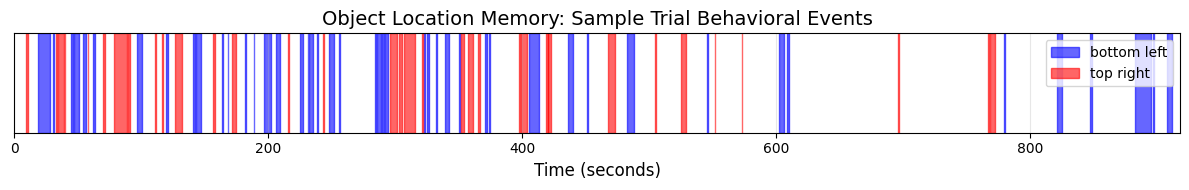

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the figure
plt.figure(figsize=(12, 2))

# Define colors for different locations
colors = {
    'Start': 'black',
    'bottom left': 'blue',
    'bottom mid': 'green',
    'top mid': 'purple',
    'top right': 'red'
}

# Plot sample events
alpha = 0.6  # Alpha for duration rectangles

plt.title('Object Location Memory: Sample Trial Behavioral Events', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.yticks([])  # Remove y-ticks since we're using the whole y-axis

# Filter out the Start events
object_events = sample_behavioral_events[sample_behavioral_events['label'] != 'Start']

# Plot object interaction events
for idx, row in object_events.iterrows():
    label = row['label']
    color = colors.get(label, 'gray')
    
    # Convert to numpy arrays if they are lists
    event_times = np.array(row['event_times']) if len(row['event_times']) > 0 else np.array([])
    durations = np.array(row['duration']) if len(row['duration']) > 0 else np.array([])
    
    if len(event_times) > 0 and len(durations) > 0 and len(durations) == len(event_times):
        for i, (time, duration) in enumerate(zip(event_times, durations)):
            if not np.isnan(duration):
                # Plot duration as rectangle that spans the whole y-axis
                rect = patches.Rectangle((time, 0), duration, 1.0, 
                                        alpha=alpha, color=color, edgecolor=None,
                                        label=f'{label}' if i == 0 else "")
                plt.gca().add_patch(rect)

# Set x-axis to show the full range of events
all_times = np.concatenate([np.array(row['event_times']) for _, row in object_events.iterrows() if len(row['event_times']) > 0])
if len(all_times) > 0:
    plt.xlim(max(0, min(all_times) - 10), max(all_times) + 10)
    
plt.ylim(0, 1)  # Set y-axis limits to match rectangle height
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [24]:
test_behavioral_events

,duration,event_times,label,event_description
id,,,,
0,[nan],[11.183],Start,when the rat is released
1,"[0.40000000000000213, 0.6999999999999993, 3.08...","[18.133, 27.433, 69.967, 91.167, 119.517, 160....",bottom left,
2,[],[],bottom mid,
3,"[0.4499999999999993, 1.4669999999999987, 4.667...","[16.133, 24.533, 49.783, 57.5, 62.3, 75.3, 111...",top mid,
4,[],[],top right,


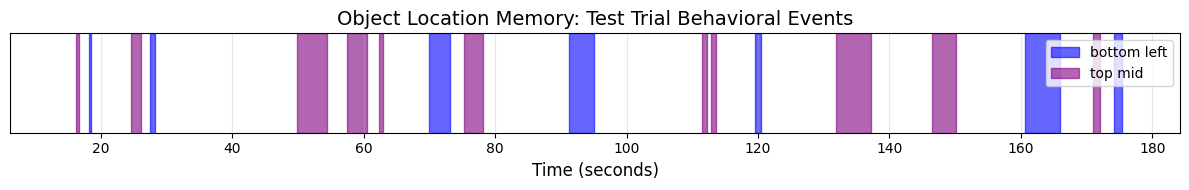

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the figure
plt.figure(figsize=(12, 2))

# Define colors for different locations
colors = {"Start": "black", "bottom left": "blue", "bottom mid": "green", "top mid": "purple", "top right": "red"}

# Plot sample events
alpha = 0.6  # Alpha for duration rectangles

plt.title("Object Location Memory: Test Trial Behavioral Events", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.yticks([])  # Remove y-ticks since we're using the whole y-axis

# Filter out the Start events
object_events = test_behavioral_events[test_behavioral_events["label"] != "Start"]

# Plot object interaction events
for idx, row in object_events.iterrows():
    label = row["label"]
    color = colors.get(label, "gray")

    # Convert to numpy arrays if they are lists
    event_times = np.array(row["event_times"]) if len(row["event_times"]) > 0 else np.array([])
    durations = np.array(row["duration"]) if len(row["duration"]) > 0 else np.array([])

    if len(event_times) > 0 and len(durations) > 0 and len(durations) == len(event_times):
        for i, (time, duration) in enumerate(zip(event_times, durations)):
            if not np.isnan(duration):
                # Plot duration as rectangle that spans the whole y-axis
                rect = patches.Rectangle(
                    (time, 0),
                    duration,
                    1.0,
                    alpha=alpha,
                    color=color,
                    edgecolor=None,
                    label=f"{label}" if i == 0 else "",
                )
                plt.gca().add_patch(rect)

# Set x-axis to show the full range of events
all_times = np.concatenate(
    [np.array(row["event_times"]) for _, row in object_events.iterrows() if len(row["event_times"]) > 0]
)
if len(all_times) > 0:
    plt.xlim(max(0, min(all_times) - 10), max(all_times) + 10)

plt.ylim(0, 1)  # Set y-axis limits to match rectangle height
plt.grid(True, alpha=0.3)
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()